In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data/train.csv', sep=';', delimiter=',', 
                    dtype={'fullVisitorId' : str, 'visitId' : str}).sample(frac=0.1).reset_index(drop=True)

In [51]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   channelGrouping                 90365 non-null  int64         
 1   date                            90365 non-null  datetime64[ns]
 2   fullVisitorId                   90365 non-null  object        
 3   sessionId                       90365 non-null  object        
 4   visitId                         90365 non-null  object        
 5   visitNumber                     90365 non-null  int64         
 6   visitStartTime                  90365 non-null  datetime64[ns]
 7   browser                         90365 non-null  int64         
 8   operatingSystem                 90365 non-null  int64         
 9   isMobile                        90365 non-null  bool          
 10  deviceCategory                  90365 non-null  int8          
 11  co

,channelGrouping,visitNumber,browser,operatingSystem,deviceCategory,continent,subContinent,country,region,metro,hits,pageviews,newVisits,bounces,transactionRevenue,campaign,medium,adContent
count,90365.000000,90365.000000,90365.000000,90365.000000,90365.000000,90365.000000,90365.000000,90365.000000,90365.000000,90365.000000,90365.000000,90365.000000,90365.000000,90365.000000,9.036500e+04,90365.000000,90365.000000,1093.000000
mean,1.699618,2.302518,2.579970,2.651513,0.300194,1.500039,1.891175,1.517435,2.347303,2.530061,4.544525,3.816544,0.775643,0.498036,1.649607e+06,1.956521,0.999889,1.073193
std,0.458668,9.520887,0.718882,0.521088,0.526506,0.500003,1.137146,1.325511,1.128738,0.570314,9.196844,6.739697,0.417160,0.499999,3.606779e+07,0.206630,0.010519,0.909929
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,2.000000,1.000000,0.000000
50%,2.000000,1.000000,3.000000,3.000000,0.000000,2.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000
75%,2.000000,1.000000,3.000000,3.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,1.000000,1.000000,0.000000e+00,2.000000,1.000000,2.000000
max,2.000000,387.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,302.000000,210.000000,1.000000,1.000000,5.601400e+09,2.000000,1.000000,2.000000


In [37]:
train.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,source,medium,keyword,referralPath,isTrueDirect,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adContent
0,2,2016-08-07,8023429178763705196,8023429178763705196_1470576210,1470576210,1,2016-08-07 13:23:30,3,3,False,...,google,1,(not provided),NaN,False,NaN,NaN,NaN,NaN,NaN
1,1,2017-02-24,5901764743470060599,5901764743470060599_1487957108,1487957108,1,2017-02-24 17:25:08,2,3,False,...,youtube.com,1,NaN,/yt/about/ru/,False,NaN,NaN,NaN,NaN,NaN
2,1,2017-05-03,067691839485867890,067691839485867890_1493848843,1493848843,1,2017-05-03 22:00:43,2,2,True,...,youtube.com,1,NaN,/yt/about/es-419/,False,NaN,NaN,NaN,NaN,NaN
3,2,2016-08-04,9528997805527636952,9528997805527636952_1470324600,1470324600,1,2016-08-04 15:30:00,3,3,False,...,(direct),1,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
4,2,2017-03-05,9621270704271950616,9621270704271950616_1488768562,1488768562,1,2017-03-06 02:49:22,3,3,False,...,google,1,(not provided),NaN,False,NaN,NaN,NaN,NaN,NaN


In [5]:
train.date = pd.to_datetime(train.date, format='%Y%m%d')
train.visitStartTime = pd.to_datetime(train.visitStartTime, unit='s')
train = pd.merge(left=train, right=pd.json_normalize(train.device.apply(json.loads)), 
                 left_index=True, right_index=True).drop('device', axis=1)
train = pd.merge(left=train, right=pd.json_normalize(train.geoNetwork.apply(json.loads)), 
                 left_index=True, right_index=True).drop('geoNetwork', axis=1)
train = pd.merge(left=train, right=pd.json_normalize(train.totals.apply(json.loads)), 
                 left_index=True, right_index=True).drop('totals', axis=1)
train = pd.merge(left=train, right=pd.json_normalize(train.trafficSource.apply(json.loads)), 
                 left_index=True, right_index=True).drop('trafficSource', axis=1)

In [6]:
train.isTrueDirect = train.isTrueDirect.fillna(False)
train.hits = train.hits.astype(int)
train.visits = train.visits.astype(int)
train.pageviews = train.pageviews.fillna(train.pageviews.astype(float).mean())
train.pageviews = train.pageviews.astype(int)
train.newVisits = train.newVisits.fillna(0)
train.newVisits = train.newVisits.astype(int)
train.bounces = train.bounces.fillna(0).astype(int)
train.transactionRevenue = train.transactionRevenue.fillna(0).astype(float)

In [9]:
for c in train:
    if train[c].nunique() <= 50:
        print(c, train[c].nunique())

channelGrouping 8
browser 33
operatingSystem 17
isMobile 2
deviceCategory 3
continent 6
subContinent 23
newVisits 2
bounces 2
campaign 8
medium 7
isTrueDirect 2
adwordsClickInfo.page 5
adwordsClickInfo.slot 2
adwordsClickInfo.adNetworkType 2
adContent 30


In [7]:
for c in train:
    if train[c][0] == 'not available in demo dataset' or train[c].nunique() == 1:
        train = train.drop(c, axis=1)

In [8]:
for c in train:
    if 2 < train[c].nunique() < 5:
        train[c] = train[c].astype('category').cat.codes

In [ ]:
for c in train:
    if 5 <= train[c].nunique() <= 1000 and train[c].dtype == 'object':
        fig, axs = plt.subplots(2, figsize=(10, 10))
        fig.suptitle(c)
        grouped = train.groupby(c).transactionRevenue.sum().reset_index()
        axs[0].barh(grouped[c], np.log(1 + grouped.transactionRevenue))
        axs[1].barh(grouped[c], grouped.transactionRevenue)
        plt.show()

In [13]:
def get_codes_by_conditions(column, df, conditions):
    df = df.groupby(column).transactionRevenue.sum().reset_index()
    codes = {}
    value = np.log(1 + df.transactionRevenue)
    for c in range(len(conditions) - 1):
        values = df.loc[(conditions[c] <= value) & (value < conditions[c + 1])][column]
        for v in values:
            codes[v] = c
    return codes

In [14]:
def show_subplots(column, df):
    fig, axs = plt.subplots(2, figsize=(10, 10))
    fig.suptitle(column)
    grouped = df.groupby(column).transactionRevenue.sum().reset_index()
    axs[0].barh(grouped[column], np.log(1 + grouped.transactionRevenue))
    axs[1].barh(grouped[column], grouped.transactionRevenue)
    plt.show()

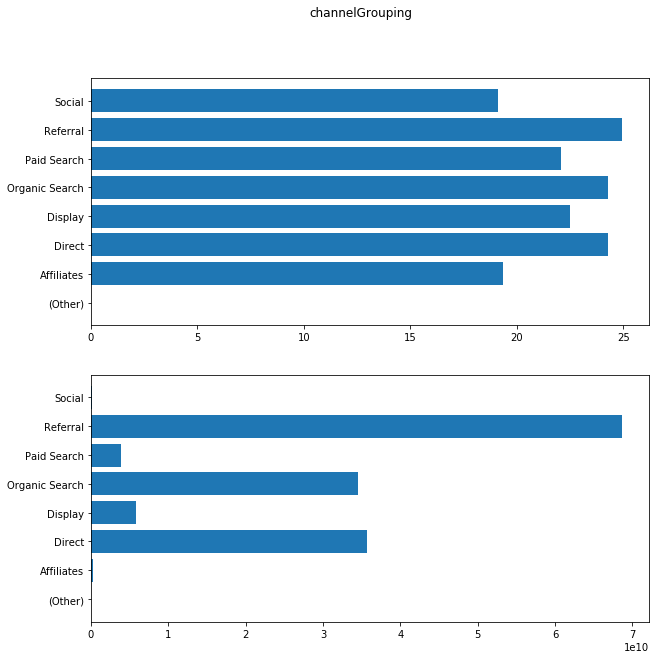

In [15]:
show_subplots('channelGrouping', train)

In [16]:
conditions = [0, 15, 23, 30]
train.channelGrouping = train.channelGrouping.map(get_codes_by_conditions('channelGrouping', train, conditions))

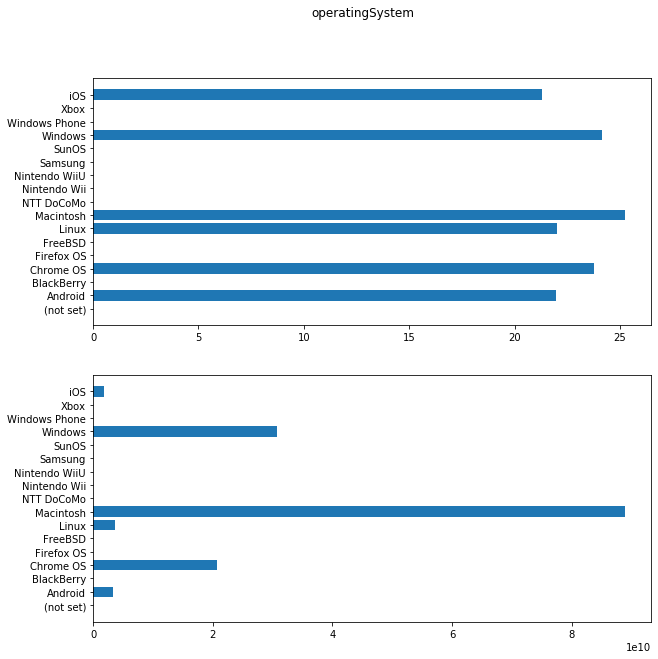

In [17]:
show_subplots('operatingSystem', train)

In [18]:
conditions = [0, 15, 20, 24, 30]
train.operatingSystem = train.operatingSystem.map(get_codes_by_conditions('operatingSystem', train, conditions))

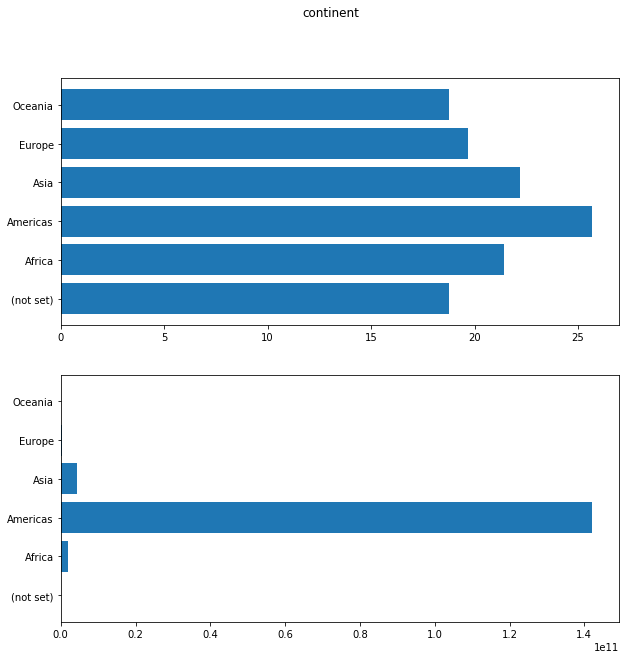

In [19]:
show_subplots('continent', train)

In [20]:
conditions = [0, 15, 25, 30]
train.continent = train.continent.map(get_codes_by_conditions('continent', train, conditions))

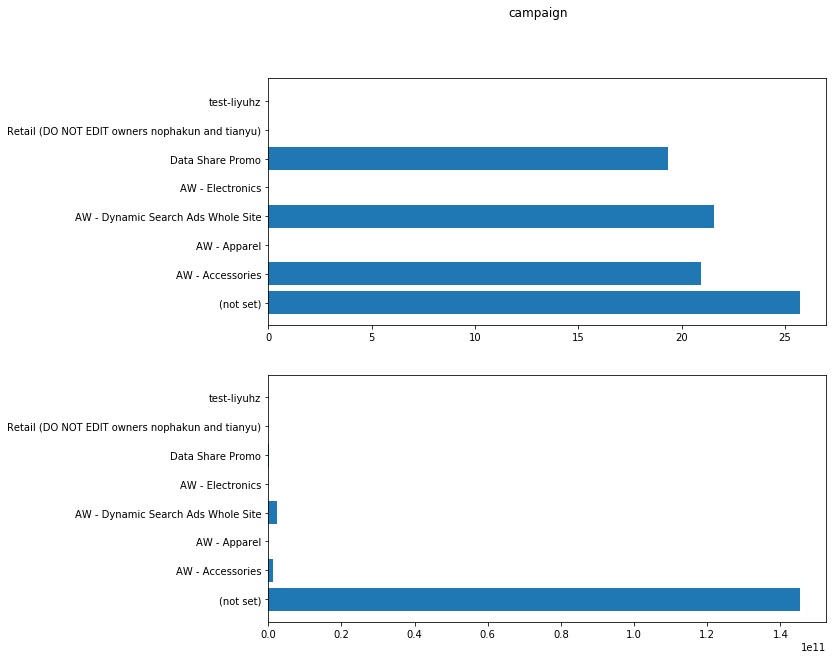

In [21]:
show_subplots('campaign', train)

In [22]:
conditions = [0, 15, 25, 30]
train.medium = train.medium.map(get_codes_by_conditions('medium', train, conditions))

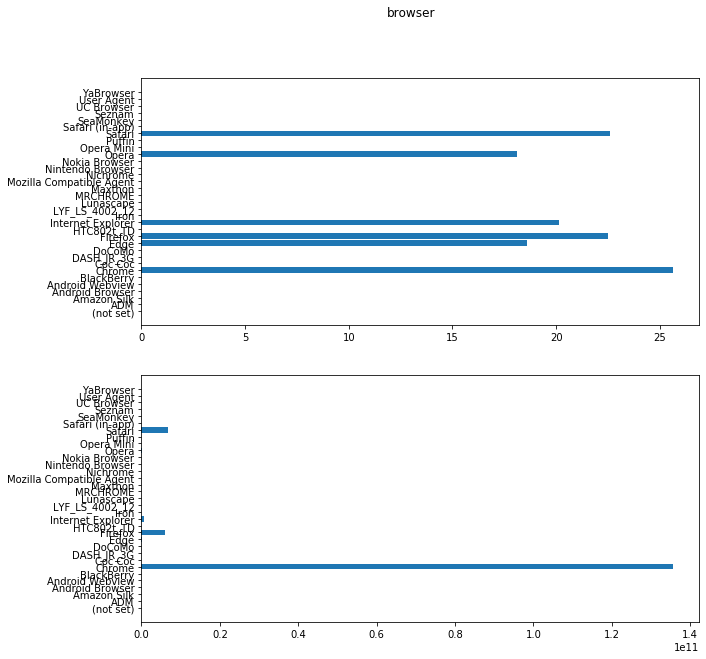

In [23]:
show_subplots('browser', train)

In [25]:
conditions = [0, 15, 22.5, 25, 30]
train.browser = train.browser.map(get_codes_by_conditions('browser', train, conditions))

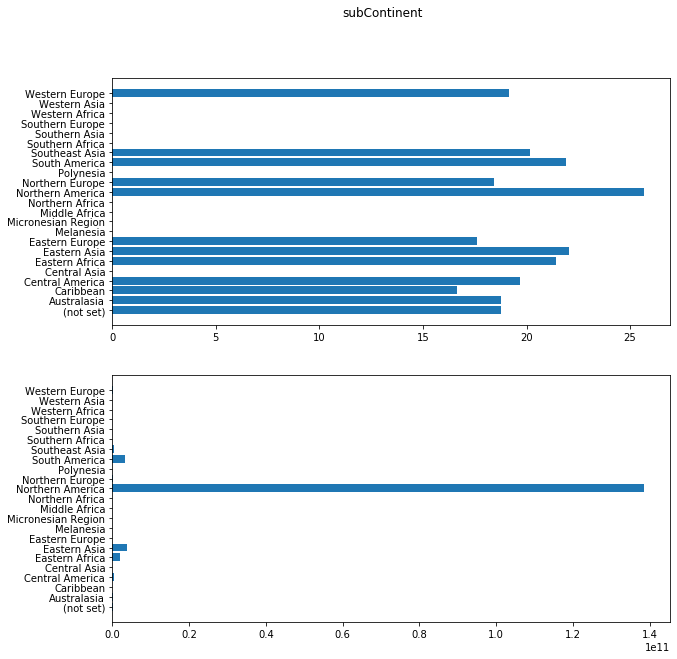

In [27]:
show_subplots('subContinent', train)

In [28]:
conditions = [0, 15, 20, 25, 30]
train.subContinent = train.subContinent.map(get_codes_by_conditions('subContinent', train, conditions))

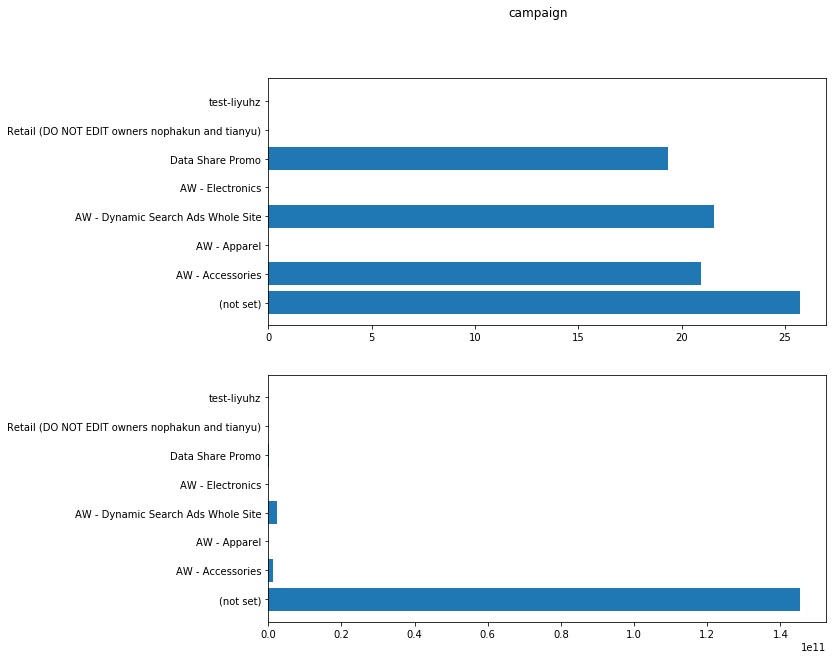

In [30]:
show_subplots('campaign', train)

In [31]:
conditions = [0, 15, 25, 30]
train.campaign = train.campaign.map(get_codes_by_conditions('campaign', train, conditions))

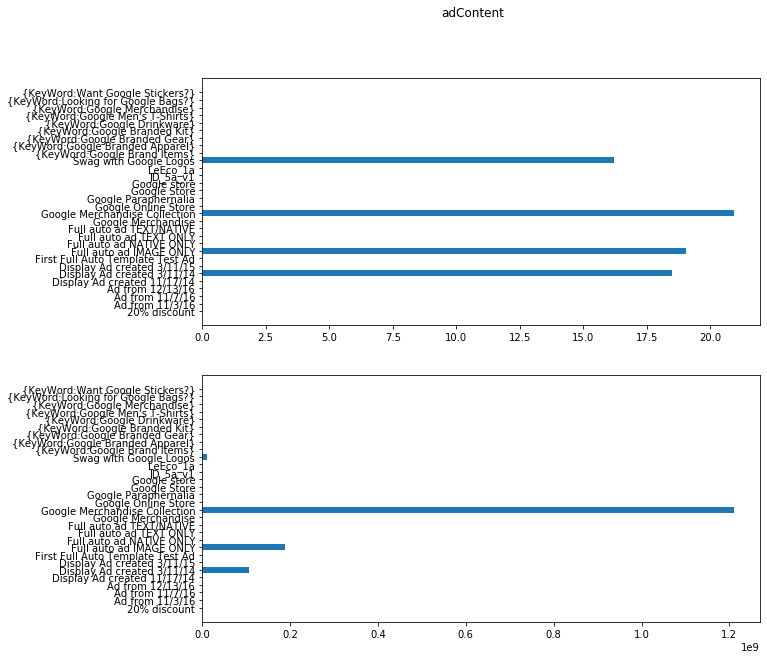

In [33]:
show_subplots('adContent', train)

In [34]:
conditions = [0, 15, 20, 30]
train.adContent = train.adContent.map(get_codes_by_conditions('adContent', train, conditions))

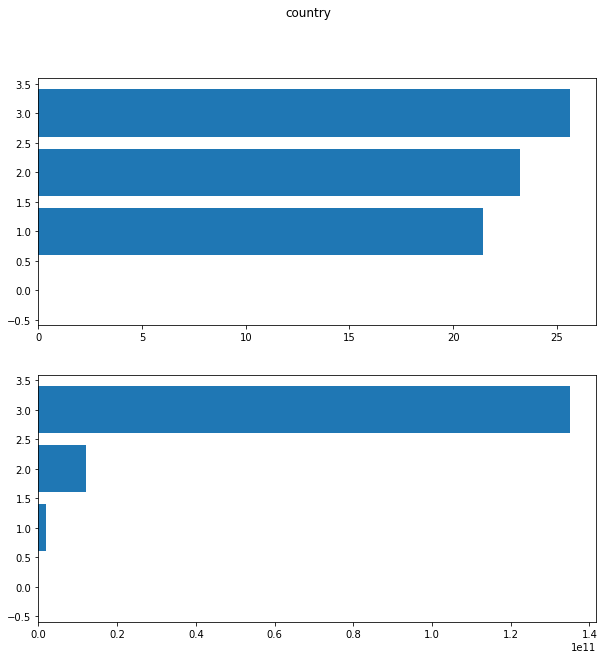

In [41]:
show_subplots('country', train)

In [40]:
conditions = [0, 15, 21, 25, 30]
train.country = train.country.map(get_codes_by_conditions('country', train, conditions))

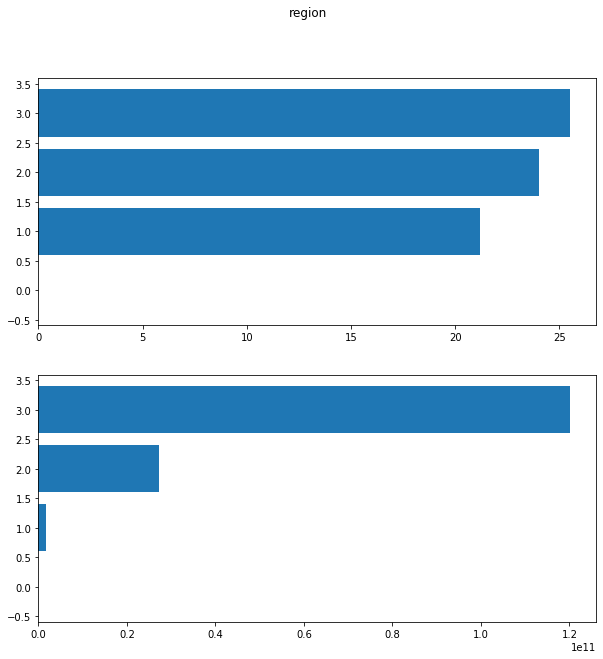

In [46]:
show_subplots('region', train)

In [45]:
conditions = [0, 15, 20, 23, 30]
train.region = train.region.map(get_codes_by_conditions('region', train, conditions))

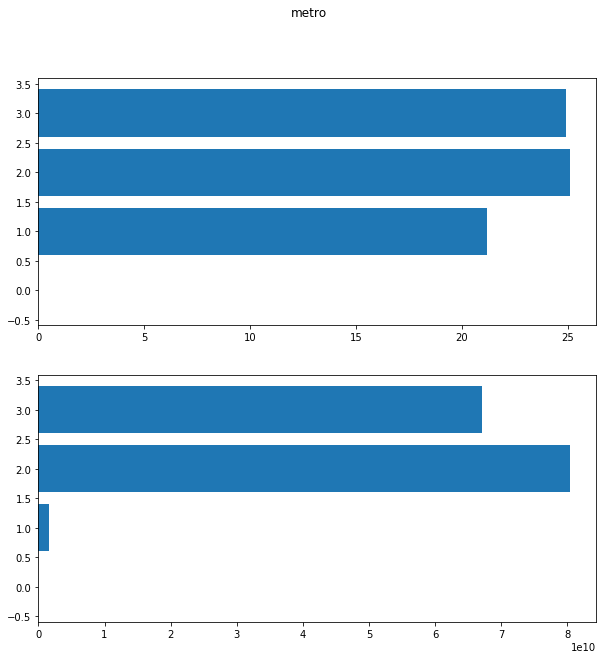

In [50]:
show_subplots('metro', train)

In [49]:
conditions = [0, 15, 20, 24, 30]
train.metro = train.metro.map(get_codes_by_conditions('metro', train, conditions))

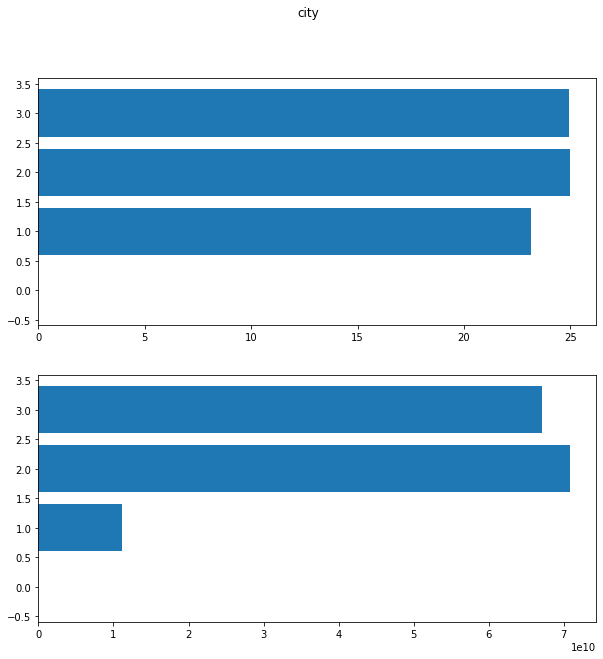

In [54]:
show_subplots('city', train)

In [53]:
conditions = [0, 15, 21, 24, 30]
train.city = train.city.map(get_codes_by_conditions('city', train, conditions))

In [157]:
!pip install mlxtend

In [55]:
df = pd.merge(left=train.fullVisitorId, right=train.select_dtypes(exclude=['object']), 
              left_index=True, right_index=True)
df = df.groupby('fullVisitorId').sum().reset_index()

In [72]:
columns = {}
df = pd.merge(left=train.fullVisitorId, right=train.select_dtypes(exclude=['object']), 
              left_index=True, right_index=True)
for c in df:
    if df[c].nunique() <= 10:
        columns[c] = 'min'
columns['transactionRevenue'] = 'sum'
df = df.groupby('fullVisitorId').agg(columns).reset_index()
df.adContent = df.adContent.fillna(-1)

In [73]:
X = df.drop(['fullVisitorId', 'transactionRevenue'], axis=1)
y = np.log(df.transactionRevenue + 1)

In [74]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

selector = SequentialFeatureSelector(LinearRegression(), verbose=2, k_features=5, forward=False, n_jobs=-1)
selector.fit(X, y)
selector.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    4.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    6.0s finished

[2020-05-08 00:40:46] Features: 16/5 -- score: 0.035868753908959626[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    4.4s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    5.5s finished

[2020-05-08 00:40:52] Features: 15/5 -- score: 0.0358926210335432[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    3.3s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.6s finished

[2020-05-08 00:40:57] Features: 14/5 -- score: 0.035914088573049695[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of

{17: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16),
  'cv_scores': array([0.02982349, 0.03639214, 0.03707636, 0.03966336, 0.03617857]),
  'avg_score': 0.03582678364318557,
  'feature_names': ('channelGrouping',
   'browser',
   'operatingSystem',
   'isMobile',
   'deviceCategory',
   'continent',
   'subContinent',
   'country',
   'region',
   'metro',
   'city',
   'newVisits',
   'bounces',
   'campaign',
   'medium',
   'isTrueDirect',
   'adContent')},
 16: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16),
  'cv_scores': array([0.03003755, 0.03638398, 0.03708341, 0.03966823, 0.0361706 ]),
  'avg_score': 0.035868753908959626,
  'feature_names': ('channelGrouping',
   'browser',
   'operatingSystem',
   'isMobile',
   'deviceCategory',
   'continent',
   'subContinent',
   'country',
   'metro',
   'city',
   'newVisits',
   'bounces',
   'campaign',
   'medium',
   'isTrueDirect',
 

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
predicted = reg.predict(X_test)
print(reg.score(y_test, predicted))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [78]:
predicted

array([0.30586381, 0.34441816, 0.00164442, ..., 0.32639143, 0.66542193,
       0.11192329])

In [95]:
X_test.shape

(17149, 17)